<a href="https://colab.research.google.com/github/ABChaeeun/study-ML_DL/blob/master/%ED%98%BC%EA%B3%B5%EB%A8%B8%EB%94%A5_3_%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC_%EB%AA%A8%EB%8D%B8%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1. k-최근접 이웃 회귀

농어의 길이만 사용

In [ ]:
import numpy as np

In [ ]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

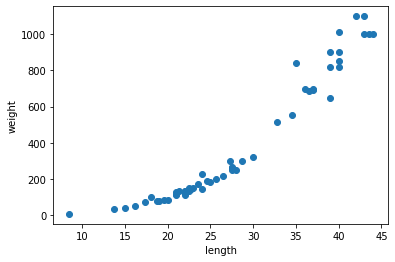

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight) # perch_weight -> 타깃값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련세트 준비

In [ ]:
from sklearn.model_selection import train_test_split

# 1차원 배열로 넣었으므로 1차원 배열로 나옴! (2차원이면 2차원으로)
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# reshape(행,열) - numpy배열의 메소드
# train_input과 test_input을 2차원 배열로 만들었다!
# (* 일반적으로 사이킷런에서)
# (* 타깃데이터(train_target, test_target)는 1차원으로 냅두는 편)
# (* 훈련데이터만 특성이 열방향으로 있어야 하기 때문에 2차원으로 바꿔준것)
train_input = train_input.reshape(-1,1); # -1 - 나머지차원이 다 결정되면 남은 차원을 사용하겠다는 뜻
test_input = test_input.reshape(-1,1);

회귀모델 훈련

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # 분류 - ~Classifier / 회귀 - Regressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error # 평균 절댓값 오차

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


과대적합과 과소적합

In [ ]:
knr.score(train_input, train_target)

0.9698823289099254

In [ ]:
knr.score(test_input, test_target)

0.992809406101064

이웃개수 줄이기

In [ ]:
knr.n_neighbors = 3 # 5에서 3으로 줄임
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


# 3-2. 선형 회귀

아주 큰 농어

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


50cm 농어의 이웃

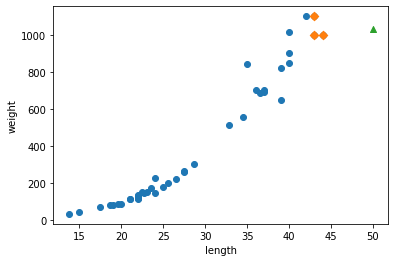

In [ ]:
# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 훈련세트 중에서 이웃샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 주황색

# 50cm 농어 데이터
plt.scatter(50,1033,marker='^') # 초록색
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

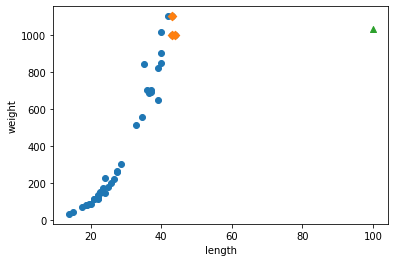

In [ ]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 훈련세트중에서 이웃샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]])) # [결과] [1241.83860323]
print(lr.coef_,lr.intercept_) # [결과] [39.01714496] -709.0186449535477

[1241.83860323]
[39.01714496] -709.0186449535477


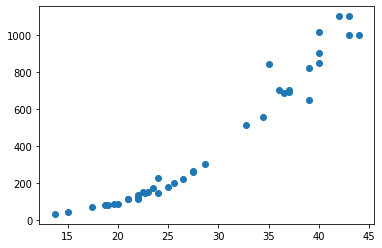

In [ ]:
# 훈련세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

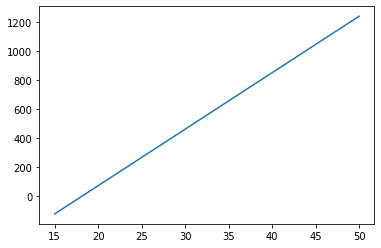

In [ ]:
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.show()

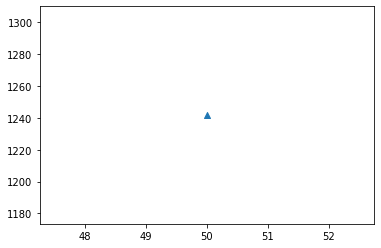

In [ ]:
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

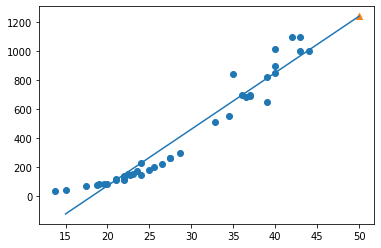

In [ ]:
# 훈련세트의 산점도를 그립니다
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))

0.939846333997604


In [ ]:
print(lr.score(test_input, test_target))

0.8247503123313558


In [ ]:
print(lr.score(train_input, train_target)) # [결과] 0.939846333997604
print(lr.score(test_input, test_target)) # [결과] 0.8247503123313558

0.939846333997604
0.8247503123313558


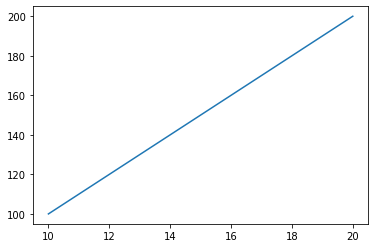

In [ ]:
plt.plot([10,20],[100,200])

# 다항회귀

In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

모델 다시 훈련

In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # [결과] [1573.98423528]
print(lr.coef_, lr.intercept_) # [결과] [  1.01433211 -21.55792498] 116.0502107827827

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


학습한 직선 그리기

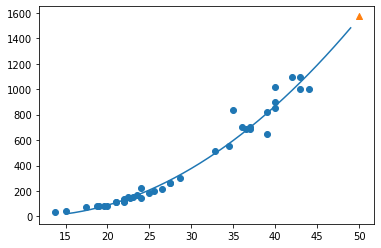

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니ㅏㄷ.
point = np.arange(15,50)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50],[1574], marker='^')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target)) # [결과] 0.9706807451768623
print(lr.score(test_poly, test_target)) # [결과] 0.9775935108325122

0.9706807451768623
0.9775935108325122


# 03-3. 특성공학과 규제

판다스로 데이터 준비

In [ ]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 1차원 배열로 넣었으므로 1차원 배열로 나옴! (2차원이면 2차원으로)
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

다항특성 만들기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# degree=2
poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2,3]]))
# [결과] [[1. 2. 3. 4. 6. 9.]]

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False) # 절편에 대한 특성을 빼기 위해 (include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# [결과] [[2. 3. 4. 6. 9.]]

[[2. 3. 4. 6. 9.]]


LinearRegression

In [ ]:
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)
# [결과] (42, 9)

(42, 9)


In [ ]:
poly.get_feature_names()
# [결과] ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [ ]:
test_poly

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ],
       [1892.25,   43.5 ],
       [ 262.44,   16.2 ],
       [ 784.  ,   28.  ],
       [ 745.29,   27.3 ]])

In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
test_poly

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [2.750000e+01, 7.280000e+00, 4.570000e+00, 7.562500e+02,
        2.002000e+02, 1.256750e+02, 5.299840e+01, 3.326960e+01,
        2.088490e+01],
       [2.130000e+01, 6.380000e+00, 3.530000e+00, 4.536900e+02,
        1.358940e+02, 7.518900e+01, 4.070440e+01, 2.252140e+01,
        1.246090e+01],
       [2.250000e+01, 5.860000e+00, 3.620000e+00, 5.062500e+02,
        1.318500e+02, 8.145000e+01, 3.433960e+01, 2.121320e+01,
        1.310440e+01],
       [4.000000e+01, 1.114000e+01, 6.630000e+00, 1.600000e+03,
        4.456000e+02, 2.652000e+02, 1.240996e+02, 7.385820e+01,
        4.395690e+01],
       [3.000000e+01, 7.620000e+00, 4.770000e+00, 9.000000e+02,
        2.286000e+02, 1.431000

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target)) # [결과] 0.9903183436982124
print(lr.score(test_poly, test_target)) # [결과] 0.9714559911594134

0.9903183436982124
0.9714559911594134


더 많은 특성 만들기

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape) #[결과] (42, 55)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target)) # [결과] 0.9999999999991097
print(lr.score(test_poly, test_target)) # [결과] -144.40579242684848

0.9999999999991097
-144.40579242684848


규제 전에 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target)) # [결과] 0.9896101671037343
print(ridge.score(test_scaled, test_target)) # [결과] 0.9790693977615397

0.9896101671037343
0.9790693977615397


적절한 규제 강도 찾기

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델을 만듭니다
  ridge = Ridge(alpha=alpha)
  # 릿지 모델을 훈련합니다
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

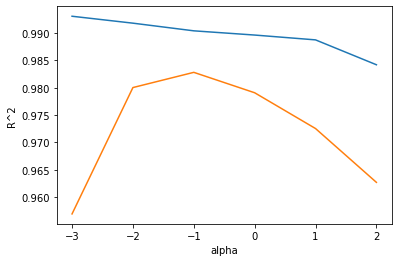

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target)) # [결과] 0.9903815817570366
print(ridge.score(test_scaled, test_target)) # [결과] 0.9827976465386926

0.9903815817570366
0.9827976465386926


### 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target)) # [결과] 0.989789897208096
print(lasso.score(test_scaled, test_target)) # [결과] 0.9800593698421883

0.989789897208096
0.9800593698421883


적절한 규제 강도 찾기

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 로그범위로(관례임!)
for alpha in alpha_list:
  # 라쏘 모델을 만듭니다
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # 라쏘 모델을 훈련합니다
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


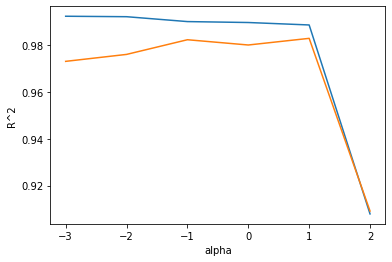

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target)) # [결과] 0.9888067471131867
print(lasso.score(test_scaled, test_target)) # [결과] 0.9824470598706695

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_==0))

40
